<a href="https://colab.research.google.com/github/Eshitaakter/Digital-Bookstore-System/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Project Title:Digital Bookstore System")

Project Title:Digital Bookstore System


In [1]:
import csv
books = [
    {"Book ID": 101, "Title": "The Great Gatsby", "Author": "F. Scott Fitzgerald", "Genre": "Fiction", "Price": 10.50, "Stock": 50, "Rating": 4.7},
    {"Book ID": 102, "Title": "To Kill a Mockingbird", "Author": "Harper Lee", "Genre": "Fiction", "Price": 7.99, "Stock": 100, "Rating": 4.8},
    {"Book ID": 103, "Title": "Becoming", "Author": "Michelle Obama", "Genre": "Biography", "Price": 15.99, "Stock": 75, "Rating": 4.9},
    {"Book ID": 104, "Title": "The Art of War", "Author": "Sun Tzu", "Genre": "Philosophy", "Price": 5.99, "Stock": 30, "Rating": 4.4},
    {"Book ID": 105, "Title": "The Lean Startup", "Author": "Eric Ries", "Genre": "Business", "Price": 12.99, "Stock": 25, "Rating": 4.3},
    {"Book ID": 106, "Title": "1984", "Author": "George Orwell", "Genre": "Sci-Fi", "Price": 8.99, "Stock": 40, "Rating": 4.6},
    {"Book ID": 107, "Title": "The Catcher in the Rye", "Author": "J.D. Salinger", "Genre": "Fiction", "Price": 6.99, "Stock": 60, "Rating": 4.2},
    {"Book ID": 108, "Title": "The Hobbit", "Author": "J.R.R. Tolkien", "Genre": "Fantasy", "Price": 11.50, "Stock": 80, "Rating": 4.9},
    {"Book ID": 109, "Title": "Educated", "Author": "Tara Westover", "Genre": "Biography", "Price": 13.99, "Stock": 50, "Rating": 4.8},
    {"Book ID": 110, "Title": "Atomic Habits", "Author": "James Clear", "Genre": "Self-help", "Price": 16.99, "Stock": 100, "Rating": 4.7},
]
csv_file = "books.csv"
fields = ["Book ID", "Title", "Author", "Genre", "Price", "Stock", "Rating"]

with open(csv_file, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()
    writer.writerows(books)

print(f"'{csv_file}' created successfully.")

'books.csv' created successfully.


In [3]:
import pandas as pd
import shutil
file_path="/content/books.csv"

def view_available_books():
    # Read books from the CSV file
    df = pd.read_csv("books.csv")
    # Filter books with stock > 0
    available_books = df[df["Stock"] > 0]
    # Display the available books
    print("\nAvailable Books:")
    print(available_books[["Book ID", "Title", "Author", "Genre", "Price", "Stock", "Rating"]])

# Example usage
view_available_books()


Available Books:
   Book ID                   Title               Author       Genre  Price  \
0      101        The Great Gatsby  F. Scott Fitzgerald     Fiction  10.50   
1      102   To Kill a Mockingbird           Harper Lee     Fiction   7.99   
2      103                Becoming       Michelle Obama   Biography  15.99   
3      104          The Art of War              Sun Tzu  Philosophy   5.99   
4      105        The Lean Startup            Eric Ries    Business  12.99   
5      106                    1984        George Orwell      Sci-Fi   8.99   
6      107  The Catcher in the Rye        J.D. Salinger     Fiction   6.99   
7      108              The Hobbit       J.R.R. Tolkien     Fantasy  11.50   
8      109                Educated        Tara Westover   Biography  13.99   
9      110           Atomic Habits          James Clear   Self-help  16.99   

   Stock  Rating  
0     50     4.7  
1    100     4.8  
2     75     4.9  
3     30     4.4  
4     25     4.3  
5     40 

In [5]:
def search_books(criteria, value):
    # Read books from the CSV file
    df = pd.read_csv("books.csv")

    # Perform case-insensitive search
    if criteria in ["Title", "Author", "Genre"]:
        filtered_books = df[df[criteria].str.contains(value, case=False, na=False)]
    elif criteria == "Rating":
        filtered_books = df[df["Rating"] >= float(value)]
    else:
        print("Invalid search criteria.")
        return

    # Display search results
    if not filtered_books.empty:
        print(f"\nBooks matching '{value}' in {criteria}:")
        print(filtered_books[["Book ID", "Title", "Author", "Genre", "Price", "Stock", "Rating"]])
    else:
        print(f"\nNo books found for '{value}' in {criteria}.")

# Example usage
search_books("Author", "Orwell")
search_books("Rating", "4.8")


Books matching 'Orwell' in Author:
   Book ID Title         Author   Genre  Price  Stock  Rating
5      106  1984  George Orwell  Sci-Fi   8.99     40     4.6

Books matching '4.8' in Rating:
   Book ID                  Title          Author      Genre  Price  Stock  \
1      102  To Kill a Mockingbird      Harper Lee    Fiction   7.99    100   
2      103               Becoming  Michelle Obama  Biography  15.99     75   
7      108             The Hobbit  J.R.R. Tolkien    Fantasy  11.50     80   
8      109               Educated   Tara Westover  Biography  13.99     50   

   Rating  
1     4.8  
2     4.9  
7     4.9  
8     4.8  


In [7]:
cart = [
    {"Book ID": 102, "Title": "To Kill a Mockingbird", "Price": 7.99},
    {"Book ID": 108, "Title": "The Hobbit", "Price": 11.50},
    {"Book ID": 110, "Title": "Atomic Habits", "Price": 16.99},
    {"Book ID": 103, "Title": "Becoming","Price": 15.99}
]

total = sum(item['Price'] for item in cart)

if total > 50:
    discount = total * 0.10  # 10% discount
    total_after_discount = total - discount
else:
    discount = 0
    total_after_discount = total


def generate_receipt(cart, total, discount, total_after_discount):
    print("\nReceipt")
    for item in cart:
        print(f"{item['Title']} - ${item['Price']:.2f}")

    print(f"\nSubtotal: ${total:.2f}")

    if discount > 0:
        print(f"Discount Applied: -${discount:.2f}")

    print(f"Total after Discount: ${total_after_discount:.2f}")

generate_receipt(cart, total, discount, total_after_discount)


Receipt
To Kill a Mockingbird - $7.99
The Hobbit - $11.50
Atomic Habits - $16.99
Becoming - $15.99

Subtotal: $52.47
Discount Applied: -$5.25
Total after Discount: $47.22


In [21]:
# Add Reviews column to each book
for book in books:
    book["Reviews"] = []

# Print updated dataset
for book in books:
    print(book)
#upated csvfile
csv_file = "books.csv"
fields = ["Book ID", "Title", "Author", "Genre", "Price", "Stock", "Rating","Reviews"]

with open(csv_file, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()
    writer.writerows(books)

print(f"'{csv_file}' updated successfully.")


# Function to simulate a purchase, add review and rating
def purchase_book(user_purchased_books, book_id, rating, review):
    # Find the book by ID
    book = next((b for b in books if b["Book ID"] == book_id), None)

    if book:
        # Simulate the purchase (decrease stock)
        if book["Stock"] > 0:
            book["Stock"] -= 1  # Decrease stock by 1
            user_purchased_books.append(book)
            print(f"Purchased: {book['Title']} for ${book['Price']}")

            # Add the rating and review
            book["Reviews"].append({"Rating": rating, "Review": review})

            # Recalculate the average rating
            avg_rating = sum(r["Rating"] for r in book["Reviews"]) / len(book["Reviews"])
            book["Rating"] = round(avg_rating, 1)

            print(f"Rating added: {rating}/5")
            print(f"Review added: {review}")
            print(f"New Average Rating for '{book['Title']}': {book['Rating']}")
        else:
            print(f"Sorry, '{book['Title']}' is out of stock!")
    else:
        print("Book not found!")

# Simulating a user who purchases books and leaves reviews
user_purchased_books = []

# User purchases a book and rates it
purchase_book(user_purchased_books, 101, 5, "A classic that never gets old!")
purchase_book(user_purchased_books, 103, 5, "Michelle Obama's inspiring journey. A must-read for all.")

# Displaying all books with their ratings and reviews
for book in books:
    print(f"\n{book['Title']} (Rating: {book['Rating']})")
    print("Reviews:")
    for review in book["Reviews"]:
        print(f"  Rating: {review['Rating']} - Review: {review['Review']}")

{'Book ID': 101, 'Title': 'The Great Gatsby', 'Author': 'F. Scott Fitzgerald', 'Genre': 'Fiction', 'Price': 10.5, 'Stock': 42, 'Rating': 4.3, 'Reviews': []}
{'Book ID': 102, 'Title': 'To Kill a Mockingbird', 'Author': 'Harper Lee', 'Genre': 'Fiction', 'Price': 7.99, 'Stock': 100, 'Rating': 4.0, 'Reviews': []}
{'Book ID': 103, 'Title': 'Becoming', 'Author': 'Michelle Obama', 'Genre': 'Biography', 'Price': 15.99, 'Stock': 70, 'Rating': 5.0, 'Reviews': []}
{'Book ID': 104, 'Title': 'The Art of War', 'Author': 'Sun Tzu', 'Genre': 'Philosophy', 'Price': 5.99, 'Stock': 25, 'Rating': 4.0, 'Reviews': []}
{'Book ID': 105, 'Title': 'The Lean Startup', 'Author': 'Eric Ries', 'Genre': 'Business', 'Price': 12.99, 'Stock': 25, 'Rating': 4.3, 'Reviews': []}
{'Book ID': 106, 'Title': '1984', 'Author': 'George Orwell', 'Genre': 'Sci-Fi', 'Price': 8.99, 'Stock': 37, 'Rating': 5.0, 'Reviews': []}
{'Book ID': 107, 'Title': 'The Catcher in the Rye', 'Author': 'J.D. Salinger', 'Genre': 'Fiction', 'Price': 6

In [22]:
import datetime

# Example sales data (simulating purchases)
sales_data = [
    {"Book ID": 101, "Quantity Sold": 10, "Sale Date": "2024-12-01"},
    {"Book ID": 102, "Quantity Sold": 25, "Sale Date": "2024-12-02"},
    {"Book ID": 103, "Quantity Sold": 5, "Sale Date": "2024-12-03"},
    {"Book ID": 104, "Quantity Sold": 8, "Sale Date": "2024-12-04"},
    {"Book ID": 105, "Quantity Sold": 12, "Sale Date": "2024-12-01"},
    {"Book ID": 106, "Quantity Sold": 20, "Sale Date": "2024-12-03"},
    {"Book ID": 107, "Quantity Sold": 15, "Sale Date": "2024-12-01"},
    {"Book ID": 108, "Quantity Sold": 18, "Sale Date": "2024-12-02"},
    {"Book ID": 109, "Quantity Sold": 10, "Sale Date": "2024-12-03"},
    {"Book ID": 110, "Quantity Sold": 30, "Sale Date": "2024-12-04"},
]

def calculate_total_sales(sales_data, books):
    total_sales = {}
    revenue_by_genre = {}

    for sale in sales_data:
        book = next(b for b in books if b["Book ID"] == sale["Book ID"])
        total_revenue = book["Price"] * sale["Quantity Sold"]

        # Track total sales
        if book["Title"] not in total_sales:
            total_sales[book["Title"]] = 0
        total_sales[book["Title"]] += sale["Quantity Sold"]

        # Track revenue by genre
        if book["Genre"] not in revenue_by_genre:
            revenue_by_genre[book["Genre"]] = 0
        revenue_by_genre[book["Genre"]] += total_revenue

    return total_sales, revenue_by_genre

# Function to generate sales report
def generate_sales_report(total_sales, revenue_by_genre):
    print("Sales Report:")

    # Most Purchased Books
    most_purchased_books = sorted(total_sales.items(), key=lambda x: x[1], reverse=True)
    print("\nMost Purchased Books:")
    for book, quantity in most_purchased_books:
        print(f"{book}: {quantity} copies sold")

    # Total Revenue by Genre
    print("\nRevenue by Genre:")
    for genre, revenue in revenue_by_genre.items():
        print(f"{genre}: ${revenue:.2f}")

# Calculate total sales and revenue by genre
total_sales, revenue_by_genre = calculate_total_sales(sales_data, books)

# Generate and display sales report
generate_sales_report(total_sales, revenue_by_genre)

Sales Report:

Most Purchased Books:
Atomic Habits: 30 copies sold
To Kill a Mockingbird: 25 copies sold
1984: 20 copies sold
The Hobbit: 18 copies sold
The Catcher in the Rye: 15 copies sold
The Lean Startup: 12 copies sold
The Great Gatsby: 10 copies sold
Educated: 10 copies sold
The Art of War: 8 copies sold
Becoming: 5 copies sold

Revenue by Genre:
Fiction: $409.60
Biography: $219.85
Philosophy: $47.92
Business: $155.88
Sci-Fi: $179.80
Fantasy: $207.00
Self-help: $509.70


In [24]:
# Users data with purchase history and total spend
users = {
    1: {"name": "Alice", "purchase_history": [101, 102, 103], "total_spent": 34.48},
    2: {"name": "Bob", "purchase_history": [106, 110, 108], "total_spent": 50.48},
    3: {"name": "Charlie", "purchase_history": [105, 107], "total_spent": 20.98},
}

def recommend_books(user_id, books, users):
    user_purchase_history = users[user_id]["purchase_history"]
    recommended_books = []

    # Get genres of books user has purchased
    user_genres = {book['Genre'] for book in books if book['Book ID'] in user_purchase_history}

    # Recommend books that are in the same genres and not already purchased by the user
    for book in books:
        if book['Genre'] in user_genres and book['Book ID'] not in user_purchase_history:
            recommended_books.append(book)

    # Sort recommended books by rating (high to low)
    recommended_books = sorted(recommended_books, key=lambda x: x['Rating'], reverse=True)

    return recommended_books

# Example usage
user_id = 1  # Alice
recommended_books = recommend_books(user_id, books, users)

print(f"Recommended books for {users[user_id]['name']}:")
for book in recommended_books:
    print(f"{book['Title']} - Rating: {book['Rating']} - Price: ${book['Price']}")


Recommended books for Alice:
Educated - Rating: 4.8 - Price: $13.99
The Catcher in the Rye - Rating: 4.2 - Price: $6.99


In [25]:
# Function to check if the user is eligible for a loyalty discount
def check_loyalty_discount(user_id, users):
    total_spent = users[user_id]["total_spent"]
    loyalty_discount = 0

    # Loyalty Program: 5% discount if user spent more than $40
    if total_spent > 40:
        loyalty_discount = 0.05
        print(f"{users[user_id]['name']} is eligible for a 5% loyalty discount!")

    return loyalty_discount

# Function to apply loyalty discount on a total purchase amount
def apply_discount(total_amount, loyalty_discount):
    return total_amount * (1 - loyalty_discount)

# Example usage
user_id = 2  # Bob
loyalty_discount = check_loyalty_discount(user_id, users)
total_purchase_amount = 60  # Example total amount
final_amount = apply_discount(total_purchase_amount, loyalty_discount)

print(f"Original amount: ${total_purchase_amount:.2f}")
print(f"Discounted amount: ${final_amount:.2f}")

Bob is eligible for a 5% loyalty discount!
Original amount: $60.00
Discounted amount: $57.00


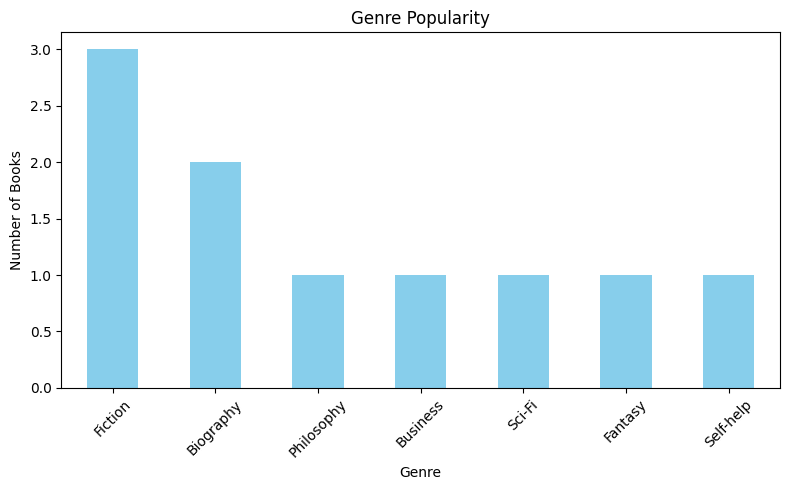

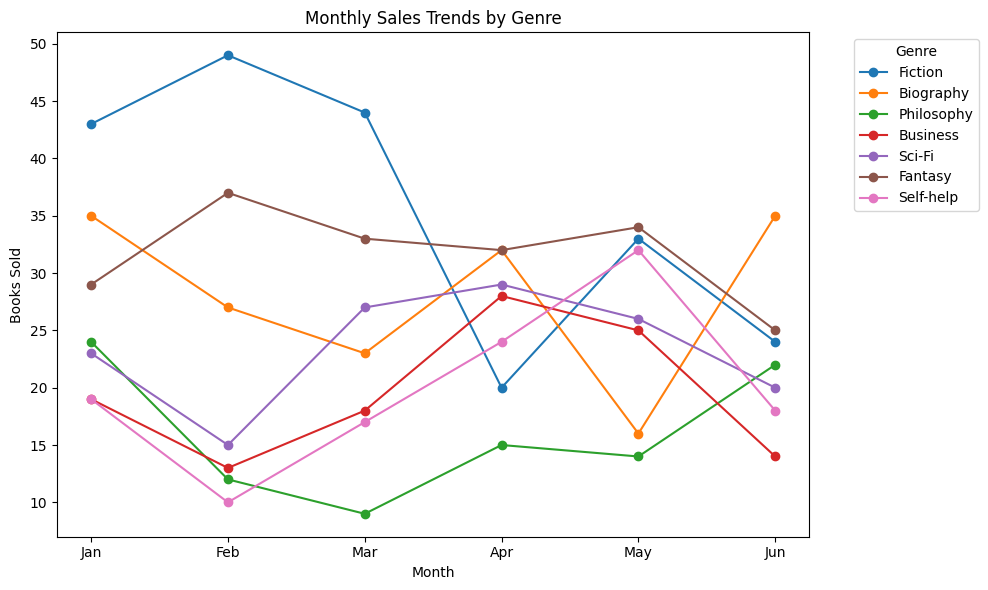

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DataFrame for books to easily work with genres and prices
df_books = pd.DataFrame(books)

# 1. Genre Popularity: Bar chart showing the number of books in each genre
genre_counts = df_books['Genre'].value_counts()

plt.figure(figsize=(8, 5))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trends: Line chart showing hypothetical sales trends over 6 months
# We'll assume that books are sold at a rate proportional to their stock (just for visualization).
# Let's create some random monthly sales data (e.g., number of books sold per month).

# Creating some dummy sales data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales_data = {
    'Fiction': np.random.randint(20, 50, 6),
    'Biography': np.random.randint(15, 40, 6),
    'Philosophy': np.random.randint(5, 25, 6),
    'Business': np.random.randint(10, 30, 6),
    'Sci-Fi': np.random.randint(15, 35, 6),
    'Fantasy': np.random.randint(10, 40, 6),
    'Self-help': np.random.randint(10, 35, 6),
}

# Convert to DataFrame
df_sales = pd.DataFrame(sales_data, index=months)

# Plot sales trends for each genre
plt.figure(figsize=(10, 6))
for genre in df_sales.columns:
    plt.plot(df_sales.index, df_sales[genre], label=genre, marker='o')

plt.title('Monthly Sales Trends by Genre')
plt.xlabel('Month')
plt.ylabel('Books Sold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
#Error Handling
class Bookstore:
    def __init__(self, books):
        self.books = books

    def view_available_books(self):
        """Display books that are in stock."""
        available_books = [book for book in self.books if book["Stock"] > 0]
        if available_books:
            for book in available_books:
                print(f"{book['Title']} - Price: ${book['Price']} - Stock: {book['Stock']}")
        else:
            print("No books available for purchase.")

    def purchase_book(self, book_id, quantity):
        """Process book purchase, update stock, and handle errors."""
        # Find the book by book_id
        book = next((book for book in self.books if book["Book ID"] == book_id), None)

        if not book:
            print("Error: Book not found.")
            return

        if quantity <= 0:
            print("Error: Invalid quantity. Quantity must be a positive integer.")
            return

        if book["Stock"] < quantity:
            print(f"Error: Insufficient stock for {book['Title']}. Only {book['Stock']} copies are available.")
            return

        # If all checks pass, proceed with the purchase
        book["Stock"] -= quantity  # Update the stock
        total_price = book["Price"] * quantity
        print(f"Purchase successful! You bought {quantity} copy(s) of '{book['Title']}' for ${total_price:.2f}")
        print(f"Remaining stock for '{book['Title']}': {book['Stock']}")

bookstore = Bookstore(books)

# Example 1: View available books
bookstore.view_available_books()

# Example 2: Attempt to purchase a book
bookstore.purchase_book(book_id=101, quantity=10)  # Valid purchase
bookstore.purchase_book(book_id=101, quantity=60)  # Insufficient stock
bookstore.purchase_book(book_id=102, quantity=0)   # Invalid quantity
bookstore.purchase_book(book_id=999, quantity=5)   # Book not found

The Great Gatsby - Price: $10.5 - Stock: 41
To Kill a Mockingbird - Price: $7.99 - Stock: 100
Becoming - Price: $15.99 - Stock: 69
The Art of War - Price: $5.99 - Stock: 25
The Lean Startup - Price: $12.99 - Stock: 25
1984 - Price: $8.99 - Stock: 37
The Catcher in the Rye - Price: $6.99 - Stock: 60
The Hobbit - Price: $11.5 - Stock: 80
Educated - Price: $13.99 - Stock: 50
Atomic Habits - Price: $16.99 - Stock: 97
Purchase successful! You bought 10 copy(s) of 'The Great Gatsby' for $105.00
Remaining stock for 'The Great Gatsby': 31
Error: Insufficient stock for The Great Gatsby. Only 31 copies are available.
Error: Invalid quantity. Quantity must be a positive integer.
Error: Book not found.
